In [6]:
Malware Dataset: https://github.com/emr4h/Malware-Detection-Using-Machine-Learning/tree/main/data-set 

Address Point Of Entry: Refers to a specific address in memory where the execution of a malicious program starts. Most malicious files use same entry points, so this could help in identifying malware vs legit files as legit files have different entry points as a whole.
 
Major Linker Version: Refers to specific version of a linker that compiles the source code of an execuatble and links them to a library so that they can be executed. Malicious files may use specific linkers or (techniques of linking to libraries or other executables).
 
Major Image Version: Refers to the compiled binary file of the malware as malware may have specific compiled patterns compared to legit files.
 
Major Operating System Version: Refers to the OS version that is required to run the malware. Some OS may be targeted more than others, especially when downloading malware.
 
DLL Characteristics: Refers to Dynamic Link Libraries used when executing a file (malware). Could show how executable interacts in a malicious or legit way (if they interact with security features and try to access permissions).
 
Size of Stack Reserve: Refers to how many stack frames are reserved for executable file. Malicious files could try to reserve very large stack frames for different attack staregies.
 
Number Of Sections.data: Refers to sections of different parts program has when linker compiles files into final version of executable. Malicious files may have large data amounts in various sections. These sections may be encoded, obfruscated, etc... to make them harder to detect. Larger sections may indicate more malicious behavior.
 
Resource Size: Refers to resouces used by executable (strings, images, icons, calls to outside sources). Malicious files may use similar icons, images, calls, etc... which could be used to compare to legit resource sizes that do not have these things in them.
 
Legitimate Data: Either 0 legit, or 1 malicious (labels associated with distinguishing in our dataset).
has context menu

SyntaxError: invalid syntax (2484579770.py, line 1)

In [2]:
import pandas as pd

malData = pd.read_csv("MalwareData.csv", sep="|") #reads the MalwareData.csv file 

legit = malData[0:41323].drop(["legitimate"], axis=1, errors='ignore') #slices the malData to include the first 41,323 rows
mal = malData[41323::].drop(["legitimate"], axis=1, errors='ignore') #slices the malData to include from 41,323 till the end

print("The shape of the of the legit dataset is: %s sample, %s features"%(legit.shape[0],legit.shape[1])) #prints the shape of the legit dataset
print("The shape of the of the malware dataset is: %s sample, %s features"%(mal.shape[0],mal.shape[1])) #prints the shape of the malware dataset

The shape of the of the legit dataset is: 41323 sample, 1 features
The shape of the of the malware dataset is: 96121 sample, 1 features


  AddressOfEntryPoint MajorLinkerVersion MajorImageVersion  \
0               10407                                        
1                5354                                        
2               58807                                        
3               25166                                        
4               70387                                        

  MajorOperatingSystemVersion DllCharacteristics SizeOfStackReserve  \
0                                                                     
1                                                                     
2                                                                     
3                                                                     
4                                                                     

  NumberOfSections ResourceSize legitimate Entropy ImportCount Packed  \
0                                                                       
1                                                     

In [3]:
print(malData.columns) #prints the names of the columns in the dataset


Index(['AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate,Entropy,ImportCount,Packed,Timestamp'], dtype='object')


In [4]:
print(malData.head(30)) #prints the first 30 columns/rows


   AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate,Entropy,ImportCount,Packed,Timestamp
0   10407,9,6,6,33088,262144,4,952,1,5.49816047538...                                                                                                                                                      
1   5354,9,6,6,33088,262144,4,952,1,7.802857225639...                                                                                                                                                      
2   58807,9,6,6,33088,262144,4,136490,1,6.92797576...                                                                                                                                                      
3   25166,9,6,6,33088,262144,4,1940,1,6.3946339367...                                                                                                                                   

In [5]:
pd.set_option("display.max_columns", None) #tells how many columns to display when you print the dataset


In [6]:
print(legit.take([1])) #prints the name of columns and the values in the rows for each section


  AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate,Entropy,ImportCount,Packed,Timestamp
1  5354,9,6,6,33088,262144,4,952,1,7.802857225639...                                                                                                                                                      


In [7]:
print(mal.take([1]))




      AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate,Entropy,ImportCount,Packed,Timestamp
41324  61532,10,0,5,33088,1048576,5,9640,0,7.63961949...                                                                                                                                                      


In [8]:
print(malData.head(5)) #prints first five rows/columns with values and names

  AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate,Entropy,ImportCount,Packed,Timestamp
0  10407,9,6,6,33088,262144,4,952,1,5.49816047538...                                                                                                                                                      
1  5354,9,6,6,33088,262144,4,952,1,7.802857225639...                                                                                                                                                      
2  58807,9,6,6,33088,262144,4,136490,1,6.92797576...                                                                                                                                                      
3  25166,9,6,6,33088,262144,4,1940,1,6.3946339367...                                                                                                                                        

In [9]:
pd.set_option("display.max_columns", None)

In [10]:
import csv
import pandas as pd

# Define the expected column names
column_names = [
    'AddressOfEntryPoint', 'MajorLinkerVersion', 'MajorImageVersion',
    'MajorOperatingSystemVersion', 'DllCharacteristics', 'SizeOfStackReserve',
    'NumberOfSections', 'ResourceSize', 'legitimate', 'Entropy', 'ImportCount', 
    'Packed', 'Timestamp'
]

# Use the csv module to read the file and manually parse each line
data = []
with open('MalwareData.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

# Create a DataFrame from the parsed data, skipping the header row
malData_expanded = pd.DataFrame(data[1:], columns=column_names)

# Save the cleaned DataFrame back to the CSV file
malData_expanded.to_csv('MalwareData.csv', index=False)

# Display the first few rows to confirm the changes
print(malData_expanded.head())





  AddressOfEntryPoint MajorLinkerVersion MajorImageVersion  \
0               10407                  9                 6   
1                5354                  9                 6   
2               58807                  9                 6   
3               25166                  9                 6   
4               70387                  9                 6   

  MajorOperatingSystemVersion DllCharacteristics SizeOfStackReserve  \
0                           6              33088             262144   
1                           6              33088             262144   
2                           6              33088             262144   
3                           6              33088             262144   
4                           6              33088             262144   

  NumberOfSections ResourceSize legitimate            Entropy ImportCount  \
0                4          952          1   5.49816047538945          34   
1                4          952          1  7.

In [91]:
# RF (Random Forest Algorithm) Takes the output from multiple decision trees to provide a result

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [12]:
import pandas as pd

# Load the dataset again or redefine malData
malData = pd.read_csv('MalwareData.csv')  
# creates a new array called data_in using the three columns 
data_in = malData.drop(['AddressOfEntryPoint', 'ResourceSize', 'legitimate'], axis=1, errors='ignore').values 
labels = malData['legitimate'].values #creates an array called labels that holds the values from the legitamate section
extratrees = ExtraTreesClassifier() #initalizes a extratrees object. Used for classification tasks
extratrees.fit(data_in, labels) #trains the ExtraTreesClassifier using the data_in features and the labels
select = SelectFromModel(extratrees,prefit=True) #intializes a selectfromModel object based on importance scores from extratrees
data_in_new = select.transform(data_in) #transforms original data_in array to only select important features chose by extratrees. Result stored in data_in_new array
print(data_in.shape,data_in_new.shape) #prints the number of shapes and features/rows/columns

(137444, 10) (137444, 3)


In [28]:
import pandas as pd #(GOOD ONE FOR SPLITTING COLUMNS)

# Load the dataset as a single column without specifying any separator
malData = pd.read_csv('MalwareData.csv', header=0, delimiter=None, engine='python')

# Split the single column into separate columns based on commas
malData_expanded = malData.iloc[:, 0].str.split(',', expand=True)

# Check how many columns were created
print("Number of columns after split:", malData_expanded.shape[1])

# Define the correct column names for all 13 columns
column_names = [
    'AddressOfEntryPoint', 'MajorLinkerVersion', 'MajorImageVersion',
    'MajorOperatingSystemVersion', 'DllCharacteristics', 'SizeOfStackReserve',
    'NumberOfSections', 'ResourceSize', 'legitimate', 'Entropy', 'ImportCount', 
    'Packed', 'Timestamp'
]

# Ensure malData_expanded has exactly 13 columns
# If there are fewer than 13 columns, add empty columns
if malData_expanded.shape[1] < 13:
    for i in range(13 - malData_expanded.shape[1]):
        malData_expanded[f'Extra{i}'] = None

# Rename columns based on expected names
malData_expanded.columns = column_names

# Save the updated dataset back to the CSV file
malData_expanded.to_csv('MalwareData.csv', index=False)

# Display the first few rows to confirm the changes
print(malData_expanded.head())



AttributeError: Can only use .str accessor with string values!

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report

# Load the dataset and use a smaller sample for faster testing
data = pd.read_csv('/Users/carterlange/Desktop/ML-Senior-Project/MalwareData.csv')  # Update with your file path
data = data.sample(frac=0.1, random_state=42)  # Use only 10% of the data

# Select only the required features and target
features = [
    'AddressOfEntryPoint', 'MajorLinkerVersion', 'MajorImageVersion',
    'MajorOperatingSystemVersion', 'DllCharacteristics', 'SizeOfStackReserve',
    'NumberOfSections', 'ResourceSize', 'Entropy', 'ImportCount', 'Packed', 'Timestamp'
]
X = data[features]
y = data['legitimate']  # Replace 'legitimate' with the name of your target column if different

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a very small parameter grid for lightweight RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],  # Smaller values
    'max_depth': [10, None],    # Limited depth options
    'min_samples_split': [2],   # Single value to minimize variation
    'min_samples_leaf': [1],    # Single value to minimize variation
    'bootstrap': [True]         # Fixed to one value to reduce complexity
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with minimal combinations
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,            # Limit the number of random parameter combinations to 5
    cv=2,                # Use 2-fold cross-validation
    scoring='accuracy',
    n_jobs=1,            # Use a single core to prevent overheating
    random_state=42,
    verbose=1
)

# Fit randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters found:", best_params)

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best parameters found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1942
           1       0.98      0.98      0.98       807

    accuracy                           0.99      2749
   macro avg       0.98      0.98      0.98      2749
weighted avg       0.99      0.99      0.99      2749



In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load the dataset with comma as the separator
malData = pd.read_csv('MalwareData.csv', sep=",")

# Define the feature set and target variable
X = malData.drop('legitimate', axis=1)  # Features, excluding the target column
y = malData['legitimate']               # Target (1 for legitimate, 0 for malicious)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier with class weights
rf_model = RandomForestClassifier(class_weight={0: 1, 1: 2}, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, '/Users/carterlange/Desktop/ML-Senior-Project/MLProject.pkl')

# Optionally, evaluate the model
score = rf_model.score(X_test, y_test)
print(f"Model accuracy: {score * 100:.2f}%")

column_names = [
    'AddressOfEntryPoint', 'MajorLinkerVersion', 'MajorImageVersion',
    'MajorOperatingSystemVersion', 'DllCharacteristics', 'SizeOfStackReserve',
    'NumberOfSections', 'ResourceSize', 'legitimate', 'Entropy', 'ImportCount', 
    'Packed', 'Timestamp'
]

# Load the CSV with explicit column names
malData = pd.read_csv('MalwareData.csv', sep="|")





Model accuracy: 98.86%


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into training and test sets
data_train, data_test, labels_train, labels_test = train_test_split(data_in_new, labels, test_size=0.2)

# Initialize the RandomForestClassifier
classif = RandomForestClassifier(n_estimators = 50)

# Fit the classifier with the training data
classif.fit(data_train, labels_train)

print("The score of the algorithm: ", classif.score(data_test,labels_test)*100) #prints the accuracy of the RandomForest Algorithm

The score of the algorithm:  96.39128378624177


In [15]:
import pandas as pd
import numpy as np
import pefile
import math

# Load original dataset
malData = pd.read_csv('MalwareData.csv', sep="|")

# Function to calculate entropy
def calculate_entropy(data):
    if len(data) == 0:
        return 0.0
    entropy = 0
    for x in range(256):
        p_x = data.count(chr(x)) / len(data)
        if p_x > 0:
            entropy += - p_x * math.log2(p_x)
    return entropy

# Define additional features
def extract_additional_features(filepath):
    try:
        pe = pefile.PE(filepath)
        features = {}
        
        # Entropy for each section
        features['Entropy'] = np.mean([calculate_entropy(str(section.get_data())) for section in pe.sections])
        
        # API imports count (indicative of functionality)
        features['ImportCount'] = len(pe.DIRECTORY_ENTRY_IMPORT) if hasattr(pe, 'DIRECTORY_ENTRY_IMPORT') else 0
        
        # Packed or compressed flag (detecting unusual characteristics)
        features['Packed'] = int(features['Entropy'] > 7)  # High entropy suggests packing
        
        # Add timestamp features if available
        features['Timestamp'] = pe.FILE_HEADER.TimeDateStamp if hasattr(pe.FILE_HEADER, 'TimeDateStamp') else 0
        
        return features
    except pefile.PEFormatError:
        return {"Entropy": 0, "ImportCount": 0, "Packed": 0, "Timestamp": 0}

# Apply to each file if you have access to the actual executable files
# malData = malData.assign(**malData['FilePath'].apply(extract_additional_features))

# Example feature integration (adding as new columns)
# malData['Entropy'], malData['ImportCount'], malData['Packed'], malData['Timestamp'] = zip(*malData['FilePath'].apply(extract_additional_features))

malData.head()  # Display updated dataset
# Save the updated dataset with each feature in its own column
malData.to_csv('MalwareData.csv', sep=",", index=False)


In [34]:
import numpy as np

# Load original dataset
malData = pd.read_csv('MalwareData.csv', sep="|")

# Mock feature values for demonstration
# Add columns with random values to simulate additional feature extraction
np.random.seed(42)  # For reproducibility

# Add new columns to the dataset with simulated values
malData['Entropy'] = np.random.uniform(4, 8, size=len(malData))  # Simulating entropy between 4 and 8
malData['ImportCount'] = np.random.randint(10, 100, size=len(malData))  # Random import count
malData['Packed'] = np.random.choice([0, 1], size=len(malData))  # 0 or 1 to indicate packed
malData['Timestamp'] = np.random.randint(1609459200, 1640995200, size=len(malData))  # Random timestamp within 2021

# Check the updated dataset
malData.head()
# Save the updated dataset, overwriting the original file



,"AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate,Entropy,ImportCount,Packed,Timestamp",Entropy,ImportCount,Packed,Timestamp
0,"10407,9,6,6,33088,262144,4,952,1,5.49816047538...",5.498160,34,0,1620177809
1,"5354,9,6,6,33088,262144,4,952,1,7.802857225639...",7.802857,68,1,1614572788
2,"58807,9,6,6,33088,262144,4,136490,1,6.92797576...",6.927976,70,0,1617924036
3,"25166,9,6,6,33088,262144,4,1940,1,6.3946339367...",6.394634,88,0,1617110424
4,"70387,9,6,6,33088,262144,4,83098,1,4.624074561...",4.624075,80,0,1618128951


In [35]:
from sklearn.metrics import confusion_matrix

result = classif.predict(data_test) #makes predictions based on the test data
conf_mat = confusion_matrix(labels_test,result) #compares labels_test with the predicted lables(result)

# table that compares predicted values to actual values to evaluate the performance of a classification algorithm

In [15]:
false_negatives 

NameError: name 'false_negatives' is not defined

In [36]:
import joblib

# Load your trained model
model = joblib.load('/Users/carterlange/Desktop/ML-Senior-Project/MLProject.pkl')

# Print the feature names the model was trained on (this assumes it's a model like RandomForest)
try:
    print(model.feature_names_in_)
except AttributeError:
    print("The model does not have 'feature_names_in_' attribute. Please ensure your model was trained with feature names.")


['AddressOfEntryPoint' 'MajorLinkerVersion' 'MajorImageVersion'
 'MajorOperatingSystemVersion' 'DllCharacteristics' 'SizeOfStackReserve'
 'NumberOfSections' 'ResourceSize' 'Entropy' 'ImportCount' 'Packed'
 'Timestamp']


In [ ]:
# data_test is the legit (non malicious files)
# labels_result is the malicious files

In [37]:
from sklearn.metrics import confusion_matrix

result = classif.predict(data_test)
conf_mat = confusion_matrix(labels_test,result)

In [38]:
conf_mat.shape #binary classification problem

(2, 2)

In [39]:
type(conf_mat) #will be an instance of the array

numpy.ndarray

In [40]:
conf_mat

array([[19145,   140],
       [  852,  7352]])

In [ ]:
''' array ( [a], [b]
            [c], [d] )      =====> [a] = true positives
                            =====> [b] = false positives  
                            =====> [c] = false negatives
                            =====> [d] = true negatives
'''


In [41]:
print("False positives: ",conf_mat[0][1]/sum(conf_mat[0])*100)
print("False negatives: ",conf_mat[1][0]/sum(conf_mat[1])*100)

False positives:  0.7259528130671506
False negatives:  10.385177961969772


In [42]:
from sklearn.ensemble import GradientBoostingClassifier # builds multiple decision trees, where each tree corrects other trees, aka GradientBoosting

grad_boost = GradientBoostingClassifier(n_estimators=500) # will consists of 50 decision trees
grad_boost.fit(data_train,labels_train) #training the model to make predictions


GradientBoostingClassifier(n_estimators=500)

In [ ]:
# n_estimators are the number of trees in RandomForest

In [43]:
print("The score of the GradientBoostingClassifier is: ",grad_boost.score(data_test,labels_test)*100)

The score of the GradientBoostingClassifier is:  96.3876459674779


In [ ]:
# KNN (K-Nearest-Neighbors Algorithm) tries to predict the correct class for the test data by calculating the distance between the test data and all the training points

In [44]:
data = pd.read_csv('MalwareData.csv') #reads the MalwareData set


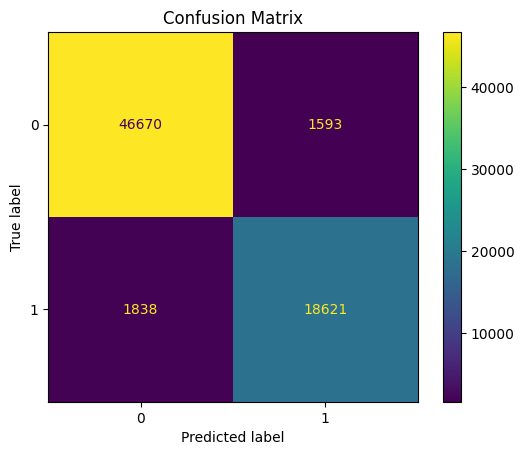

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     48263
           1       0.92      0.91      0.92     20459

    accuracy                           0.95     68722
   macro avg       0.94      0.94      0.94     68722
weighted avg       0.95      0.95      0.95     68722



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


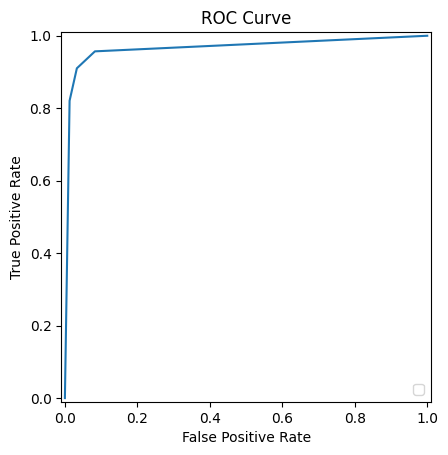

Cross-validated scores: [0.94997999 0.95143512 0.94888865 0.95121685 0.94859575]
Mean CV Score: 0.9500232718232811


In [71]:
#Cross Validation: Technique used to assess how well a machine learning model can generalize to an independent column of the dataset
#Example: legitimate, which is a column in our dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('MalwareData.csv')  # Reads the Dataset
X = data.drop('legitimate', axis=1)  # Column in the dataset that we are choosing to indiviually assess
y = data['legitimate']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42, stratify=y)

# Initialize and train the KNN model
knModel = KNeighborsClassifier(n_neighbors=3)  # Example k value, you might want to optimize this
knModel.fit(X_train, y_train)

# Get predictions
y_pred = knModel.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Compute ROC curve
y_score = knModel.predict_proba(X_test)[:, 1]  # Get the probability estimates for the positive class
fpr, tpr, _ = roc_curve(y_test, y_score)

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title("ROC Curve")
plt.show()

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) #splits into 5 folds, data shuffled before splitting, and seed to make it reproducible
cv_scores = cross_val_score(knModel, X_scaled, y, cv=kf) #Uses CV on KNN model
print(f"Cross-validated scores: {cv_scores}") #prints and scores of cv for each fold
print(f"Mean CV Score: {np.mean(cv_scores)}") 


#ROC curve: a graph that shows how well a model performs across different thresholds

#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm = confusion_matrix(y_true, y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot()

# from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [49]:
df = pd.read_csv('MalwareData.csv') #read the dataset file

In [48]:
df #prints data frame

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate,Entropy,ImportCount,Packed,Timestamp
0,10407,9,6,6,33088,262144,4,952,1,5.498160,34,0,1620177809
1,5354,9,6,6,33088,262144,4,952,1,7.802857,68,1,1614572788
2,58807,9,6,6,33088,262144,4,136490,1,6.927976,70,0,1617924036
3,25166,9,6,6,33088,262144,4,1940,1,6.394634,88,0,1617110424
4,70387,9,6,6,33088,262144,4,83098,1,4.624075,80,0,1618128951
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137439,123291,11,0,5,33088,1048576,5,81654,0,7.114933,97,0,1633968020
137440,40000,2,6,1,32768,1048576,8,67624,0,7.687767,57,0,1636271053
137441,59610,10,0,5,33088,1048576,5,22648,0,7.198302,30,0,1628480632
137442,51216,2,0,1,0,1048576,8,2216,0,4.766136,21,1,1623297420


In [50]:
df.shape #this means the dataset has 137444 rows by 9 columns

(137444, 13)

In [51]:
df.groupby(df['legitimate']).size() #0 stands for true, 1 stands for false

legitimate
0    96526
1    40918
dtype: int64

In [51]:
features = df.iloc[:,[0,1,2,3,4,5,6,7]].values 

# extracting the first 8 columns from the dataset - features


In [52]:
features

array([[  10407,       9,       6, ...,  262144,       4,     952],
       [   5354,       9,       6, ...,  262144,       4,     952],
       [  58807,       9,       6, ...,  262144,       4,  136490],
       ...,
       [  59610,      10,       0, ..., 1048576,       5,   22648],
       [  51216,       2,       0, ..., 1048576,       8,    2216],
       [  22731,      11,       0, ..., 1048576,       5,  318464]])

In [53]:
ifMalware = df.iloc[:,8].values 

# extracting the legitimate column of the dataset - safe & malware results, the last column of our dataset


In [54]:
ifMalware


array([1, 1, 1, ..., 0, 0, 0])

In [55]:
features_train, features_test, ifMalware_train, ifMalware_test = train_test_split(features, ifMalware, test_size=0.25)
# Tests features on 25% of the dataset, Trains the other 75%

In [56]:
knModel = KNeighborsClassifier(n_neighbors=1) 

# Defined the model.


In [57]:
knModel.fit(features_train, ifMalware_train) 

# Provided training data.


KNeighborsClassifier(n_neighbors=1)

In [58]:
knPredict = knModel.predict(features_test) 

# Give the test data then call predict.


In [59]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifMalware_test != knPredict).sum())) #prints out test set

Number of mislabeled out of a total of 34361 test entries: 911


In [60]:
successRate = 100 * f1_score(ifMalware_test, knPredict, average='micro') # Success rate calculation


In [61]:
print("The Success Rate was calculated as % : " + str(successRate) + " with the K-Nearest-Neighbors")


The Success Rate was calculated as % : 97.34873839527371 with the K-Nearest-Neighbors


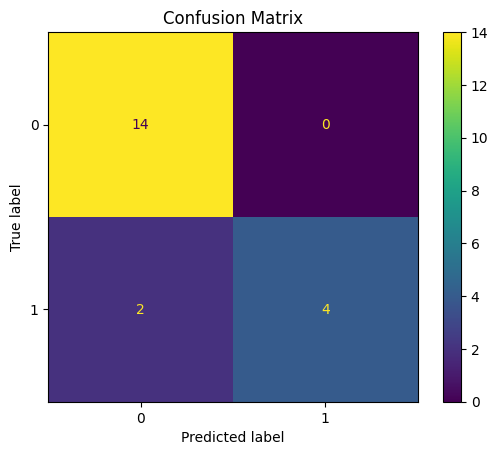

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('MalwareData.csv')  
X = data.drop('legitimate', axis=1)  
y = data['legitimate']

# Example synthetic data for demonstration (remove this when using your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=12, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(X_train, y_train)

# Get predictions
y_pred = knModel.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create and display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title('Confusion Matrix')
plt.show()



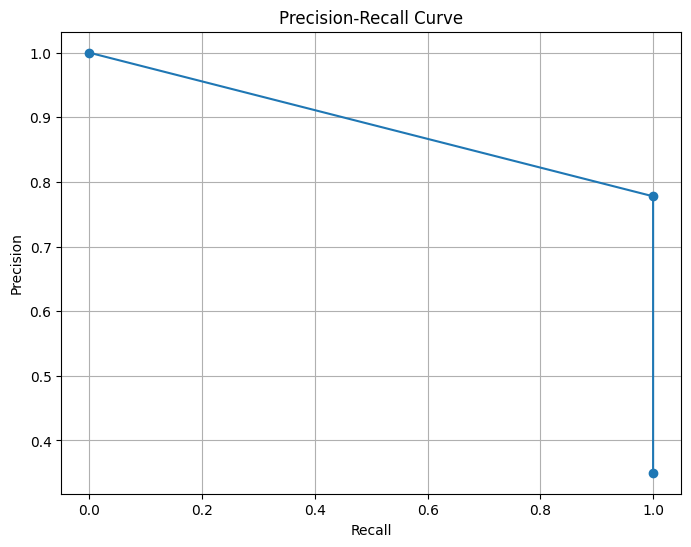

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('MalwareData.csv')  
X = data.drop('legitimate', axis=1) 
y = data['legitimate']

# Example synthetic data for demonstration (remove this when using your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(X_train, y_train)

# Get predicted probabilities
y_scores = knModel.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

# graph that shows how well it performs by plotting precision vs recall. Summarizes overall performance of the model
# Recall = True Positives/ True Positives + False Negatives
 



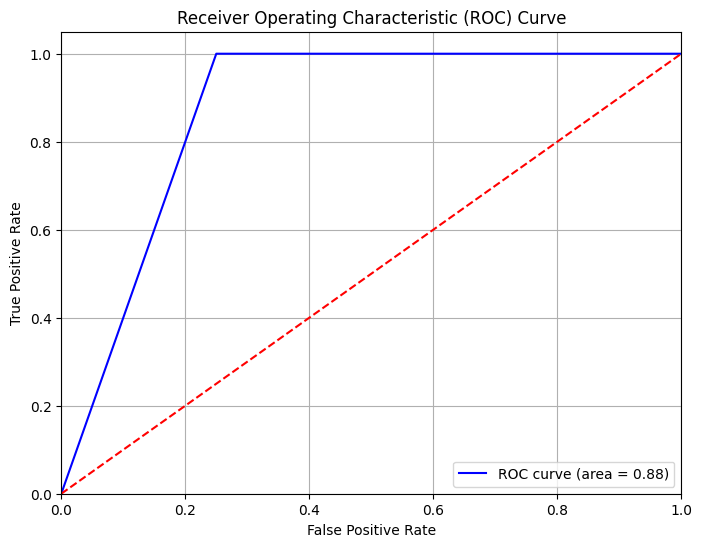

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('MalwareData.csv')  
X = data.drop('legitimate', axis=1)  
y = data['legitimate']

# Example synthetic data for demonstration (remove this when using your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=12, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(X_train, y_train)

# Get predicted probabilities
y_scores = knModel.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#shows how well the model performs over various different thresholds. (0.92 ROC curve is great)